In [1]:
import torch
import albumentations as A
from albumentations.pytorch import ToTensorV2
import torch.nn as nn
import torch.optim as optim
from model import UNET
from dataloader import get_loaders_masks
import FILE_PATHS
import pandas as pd

from training_masks import(
    train, 
    plot_loss_curves
)
from utils import (
    load_checkpoint,
    save_checkpoint,
    check_accuracy,
    save_predictions_as_imgs,
    train_fn
)

In [2]:
# Hyperparameters
LEARNING_RATE = 1e-4
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
BATCH_SIZE = 64
NUM_EPOCHS = 20
NUM_WORKERS = 4
IMAGE_HEIGHT = 112
IMAGE_WIDTH = 112
PIN_MEMORY = True
LOAD_MODEL = False

filename = "../EchoNet-Dynamic/models/mask_model.pth.tar"

In [3]:
# Transformations
train_transforms = A.Compose(
    [
        A.Resize(height=IMAGE_HEIGHT, width=IMAGE_WIDTH),
        # A.Rotate(limit=35, p=1.0),
        # A.HorizontalFlip(p=0.5),
        # A.VerticalFlip(p=0.1),
        A.Normalize(
            mean=[0.0, 0.0, 0.0],
            std=[1.0, 1.0, 1.0],
            max_pixel_value=255.0,
        ),
        ToTensorV2(),
    ]
)

val_transforms = A.Compose(
    [
        A.Resize(height=IMAGE_HEIGHT, width=IMAGE_WIDTH),
        A.Normalize(
            mean=[0.0, 0.0, 0.0],
            std=[1.0, 1.0, 1.0],
            max_pixel_value=255.0,
        ),
        ToTensorV2(),
    ]
)

In [4]:
# MODEL
model = UNET(in_channels=3, out_channels=1).to(DEVICE)
loss_fn = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
model_type = "masks"

In [5]:
# BATCHES
train_loader, val_loader = get_loaders_masks(
    FILE_PATHS.IMAGES,
    FILE_PATHS.MASKS,
    BATCH_SIZE,
    train_transforms,
    val_transforms,
    NUM_WORKERS,
    test_size=0.2,
    seed=42,
)

TRAIN PATHS LENGTHS: images, masks
16038, 16038
VALIDATION PATHS LENGTHS: images, masks
4010, 4010


In [6]:
if LOAD_MODEL:
    load_checkpoint(torch.load("mask_model.pth.tar"), model)

model_0_results = train(model=model, 
                        train_dataloader=train_loader,
                        test_dataloader=val_loader,
                        optimizer=optimizer,
                        loss_fn=loss_fn, 
                        epochs=NUM_EPOCHS,
                        device=DEVICE)

=> Saving checkpoint


  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.2820 | train_acc: 0.9674 | test_loss: 0.2055 | test_acc: 0.9841


  5%|▌         | 1/20 [03:02<57:48, 182.56s/it]

Epoch: 2 | train_loss: 0.1725 | train_acc: 0.9844 | test_loss: 0.1446 | test_acc: 0.9848


 10%|█         | 2/20 [06:22<57:49, 192.73s/it]

Epoch: 3 | train_loss: 0.1241 | train_acc: 0.9853 | test_loss: 0.1050 | test_acc: 0.9857


 15%|█▌        | 3/20 [09:47<56:12, 198.36s/it]

Epoch: 4 | train_loss: 0.0936 | train_acc: 0.9862 | test_loss: 0.0836 | test_acc: 0.9856


 20%|██        | 4/20 [13:27<55:10, 206.91s/it]

Epoch: 5 | train_loss: 0.0741 | train_acc: 0.9868 | test_loss: 0.0717 | test_acc: 0.9850


 25%|██▌       | 5/20 [17:06<52:49, 211.30s/it]

Epoch: 6 | train_loss: 0.0609 | train_acc: 0.9874 | test_loss: 0.0606 | test_acc: 0.9855


 30%|███       | 6/20 [20:37<49:15, 211.14s/it]

Epoch: 7 | train_loss: 0.0518 | train_acc: 0.9878 | test_loss: 0.0527 | test_acc: 0.9860


 35%|███▌      | 7/20 [24:08<45:43, 211.02s/it]

Epoch: 8 | train_loss: 0.0444 | train_acc: 0.9886 | test_loss: 0.0485 | test_acc: 0.9859


 40%|████      | 8/20 [27:35<41:57, 209.78s/it]

Epoch: 9 | train_loss: 0.0390 | train_acc: 0.9893 | test_loss: 0.0526 | test_acc: 0.9836


 45%|████▌     | 9/20 [31:02<38:17, 208.84s/it]

Epoch: 10 | train_loss: 0.0342 | train_acc: 0.9901 | test_loss: 0.0449 | test_acc: 0.9857


 50%|█████     | 10/20 [34:27<34:37, 207.70s/it]

Epoch: 11 | train_loss: 0.0304 | train_acc: 0.9908 | test_loss: 0.0419 | test_acc: 0.9862


 55%|█████▌    | 11/20 [37:53<31:06, 207.34s/it]

Epoch: 12 | train_loss: 0.0275 | train_acc: 0.9913 | test_loss: 0.0424 | test_acc: 0.9859


 60%|██████    | 12/20 [41:20<27:36, 207.10s/it]

Epoch: 13 | train_loss: 0.0246 | train_acc: 0.9920 | test_loss: 0.0418 | test_acc: 0.9861


 65%|██████▌   | 13/20 [44:52<24:20, 208.64s/it]

Epoch: 14 | train_loss: 0.0224 | train_acc: 0.9925 | test_loss: 0.0464 | test_acc: 0.9853


 70%|███████   | 14/20 [48:27<21:03, 210.50s/it]

Epoch: 15 | train_loss: 0.0201 | train_acc: 0.9931 | test_loss: 0.0456 | test_acc: 0.9854


 75%|███████▌  | 15/20 [52:01<17:38, 211.63s/it]

Epoch: 16 | train_loss: 0.0185 | train_acc: 0.9935 | test_loss: 0.0442 | test_acc: 0.9861


 80%|████████  | 16/20 [55:58<14:37, 219.30s/it]

Epoch: 17 | train_loss: 0.0170 | train_acc: 0.9939 | test_loss: 0.0440 | test_acc: 0.9863


 85%|████████▌ | 17/20 [1:00:03<11:20, 226.90s/it]

Epoch: 18 | train_loss: 0.0157 | train_acc: 0.9943 | test_loss: 0.0457 | test_acc: 0.9861


 90%|█████████ | 18/20 [1:03:37<07:26, 223.07s/it]

Epoch: 19 | train_loss: 0.0145 | train_acc: 0.9946 | test_loss: 0.0472 | test_acc: 0.9861


 95%|█████████▌| 19/20 [1:07:16<03:41, 221.81s/it]

Epoch: 20 | train_loss: 0.0136 | train_acc: 0.9949 | test_loss: 0.0465 | test_acc: 0.9862


100%|██████████| 20/20 [1:10:57<00:00, 212.87s/it]


In [9]:
# save model
checkpoint = {
    "state_dict": model.state_dict(),
    "optimizer": optimizer.state_dict(),
}

save_checkpoint(checkpoint, filename)

=> Saving checkpoint


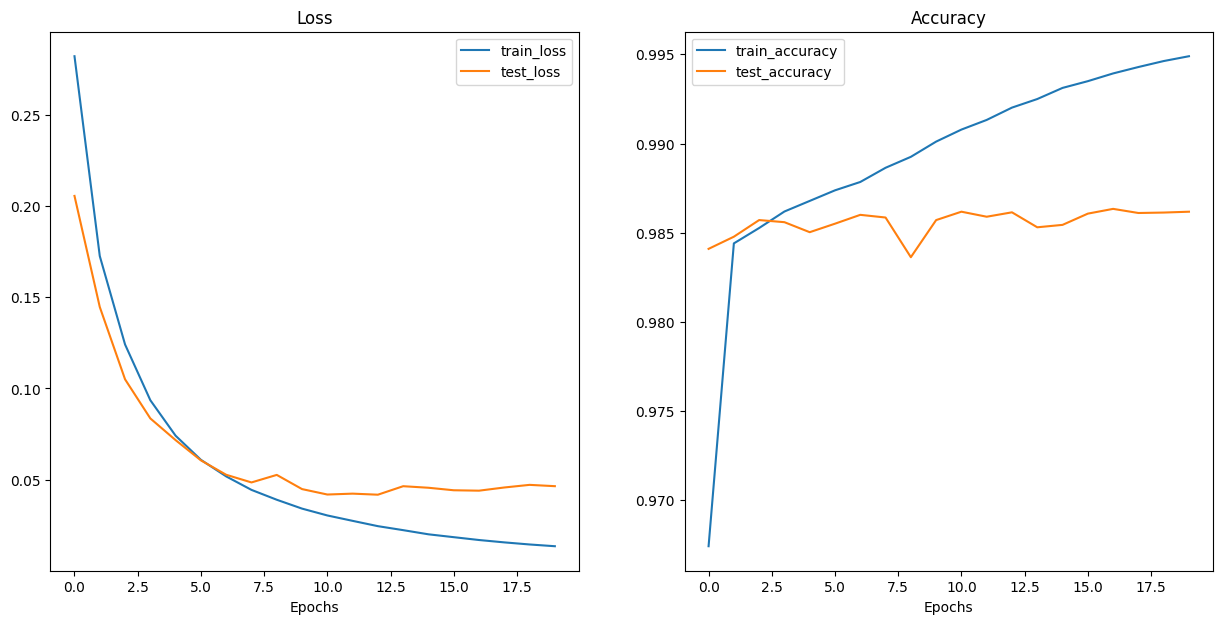

In [7]:
plot_loss_curves(model_0_results)

In [8]:
mask_model = pd.DataFrame(model_0_results)
mask_model.to_csv("mask_model.csv")
